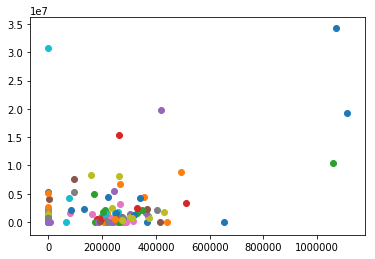

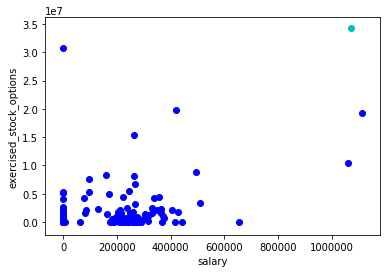

In [3]:
# %load k_means_cluster.py
#!/usr/bin/python3

""" 
    Skeleton code for k-means clustering mini-project.
"""


import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(finance_features)
pred = kmeans.predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")


In [8]:
exercised_stock_options = [
    data_dict[k]["exercised_stock_options"] for k in data_dict \
        if data_dict[k]["exercised_stock_options"] != 'NaN'
]
print(exercised_stock_options)
option_1m = float(1000000 - min(exercised_stock_options)) / (max(exercised_stock_options) - min(exercised_stock_options))
print(option_1m)

[6680544, 4890344, 651850, 5538001, 493489, 1104054, 608750, 880290, 2282768, 765313, 2218275, 372205, 1056320, 185063, 1030329, 4346544, 81042, 3285, 1441898, 1465734, 1635238, 98718, 601438, 850477, 4158995, 1624396, 2027865, 436515, 4046157, 371750, 607837, 1835558, 1624396, 412878, 17378, 3282960, 1623010, 2291113, 1362375, 139130, 2549361, 34348384, 1637034, 757301, 83237, 257817, 187500, 940257, 1753766, 5210569, 9803, 664461, 59539, 7509039, 1599641, 953136, 8191755, 1451869, 4452476, 343434, 19794175, 850010, 117551, 5266578, 19250000, 1426469, 886231, 2022048, 1324578, 1668260, 1297049, 5127155, 1729541, 281073, 431750, 506765, 754966, 4160672, 28798, 2604490, 825464, 192758, 400478, 636246, 8308552, 30766064, 1550019, 8831913, 10433518, 15364167, 664375, 176378, 759557, 671737, 2165172, 591250, 2070306, 2542813, 3181250, 765920, 384728]
0.029020588934683227


In [9]:
salary_list = [data_dict[k]["salary"] if data_dict[k]["salary"] != "NaN" else 0 for k in data_dict]
print(salary_list)
salary_200k = float(200000 - min(salary_list)) / (max(salary_list) - min(salary_list))
print(salary_200k)


[365788, 267102, 170941, 0, 243293, 267093, 0, 370448, 374125, 197091, 130724, 0, 248546, 257486, 0, 0, 288542, 251654, 288558, 63744, 0, 357091, 271442, 0, 0, 304110, 0, 187922, 0, 213625, 249201, 0, 231330, 0, 182245, 0, 211788, 0, 0, 0, 224305, 273746, 339288, 216582, 210500, 0, 0, 272880, 477, 0, 269076, 428780, 211844, 0, 206121, 174246, 510364, 365038, 0, 365163, 162779, 0, 236457, 0, 1072321, 261516, 329078, 0, 184899, 192008, 0, 262663, 304588, 0, 0, 278601, 0, 199157, 0, 96840, 80818, 213999, 262788, 210692, 222093, 440698, 0, 240189, 420636, 275101, 0, 314288, 94941, 0, 239502, 1111258, 0, 0, 0, 6615, 0, 288589, 404338, 0, 259996, 317543, 0, 201955, 248146, 0, 0, 0, 263413, 0, 76399, 655037, 0, 261809, 248017, 0, 229284, 231946, 221003, 158403, 0, 250100, 492375, 1060932, 261879, 0, 239671, 0, 0, 0, 309946, 0, 85274, 247338, 349487, 330546, 0, 415189, 265214, 278601, 274975]
0.17997620714541537
